In [1]:
import pandas as pd
df=pd.read_csv(r'diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.shape

(768, 9)

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Split the dataset into input features and target column

In [4]:
x=df.drop('Outcome',axis=1) 
y=df['Outcome'] 
x.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Divide into Train dataset and test dataset

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0) 

Apply ML algo into training data

In [6]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(x_train,y_train)

AdaBoostClassifier()

Model Prediction

In [7]:
y_pred=model.predict(x_test)

Model Evaluation

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test, y_pred)
cm

array([[117,  13],
       [ 31,  31]], dtype=int64)

<Axes: >

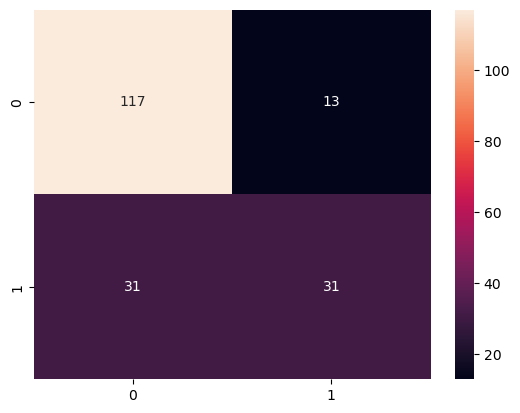

In [10]:
import seaborn as sns 
sns.heatmap(data=cm, annot=True, fmt='d')

In [11]:
accuracy_score(y_test, y_pred)*100

77.08333333333334

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       130
           1       0.70      0.50      0.58        62

    accuracy                           0.77       192
   macro avg       0.75      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred=model.predict(x_test)

In [19]:
model2.score(x_test,y_test)

0.7239583333333334